In [1]:
import shutil

import cv2;
import numpy as np;
import matplotlib.pyplot as plt

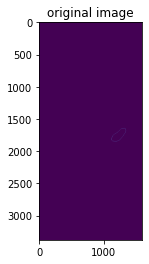

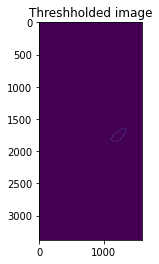

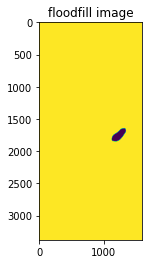

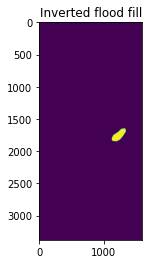

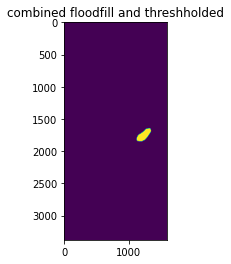

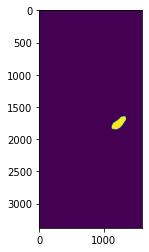

In [2]:
DataDir = 'C:/Users/moham/Desktop/images with masks/masks1/Benign/A_1123_1.LEFT_MLO_Mask.png'
# Read image
im_in = cv2.imread(DataDir, cv2.IMREAD_GRAYSCALE)
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.

th, im_th = cv2.threshold(im_in, 0, 255,cv2.THRESH_BINARY)

# Copy the thresholded image.
im_floodfill = im_th.copy()

# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);

# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv

th, im_out_final = cv2.threshold(im_out, 0, 3,cv2.THRESH_BINARY)
# Display images.
plt.imshow(im_in)
plt.title("original image")
plt.show()
plt.imshow(im_th)
plt.title("Threshholded image")
plt.show()
plt.imshow( im_floodfill)
plt.title("floodfill image")
plt.show()
plt.imshow( im_floodfill_inv)
plt.title("Inverted flood fill")
plt.show()
plt.imshow( im_out)
plt.title("combined floodfill and threshholded")
plt.show()
plt.imshow(im_out_final)
plt.show()

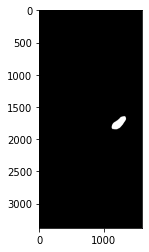

(3376, 1591)
(3376, 1591)
(3376, 1591)


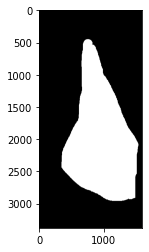

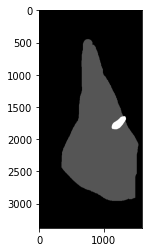

In [3]:
img = im_out_final
plt.imshow(img, cmap='gray')
plt.show()
print(img.shape)
print(img.shape)

breastmask=cv2.imread('C:/Users/moham/Desktop/images with masks/masks/Benign/A_1123_1_LEFT_MLO_breastArea.ome.tiff',0)
print(breastmask.shape)
plt.imshow(breastmask, cmap='gray')
plt.show()
# print(breastmask.shape)
img=cv2.resize(img, dsize=(breastmask.shape[1],breastmask.shape[0]))
cropped=img|breastmask
plt.imshow(cropped, cmap='gray')
plt.show()
# cropped[cropped >= 3] = 2
# plt.imshow(cropped)
# plt.show()

In [6]:
import shutil
import os
import cv2
import numpy as np;
DATADIR="C:/Users/moham/Desktop/breast cancer dataset/MasksCancer"
WritePath='C:/Users/moham/Desktop/benVCan/'
CATEGORIES=['Benign','Cancer']

mask_data = []
def load_Mask_Data():
    countC=0
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        path1= os.path.join(WritePath,category)
        os.chdir(path)
        for img in os.listdir(path):
            if img.endswith('FloodFill.png'):
                if CATEGORIES.index(category)==0:
                    shutil.copy(img, path1+'/masks')
                if CATEGORIES.index(category)==1:
                    countC+=1
                    shutil.copy(img, path1+'/masks')
                    if countC==1402:
                        break
                # im_in = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE);
                # th, im_th = cv2.threshold(im_in, 0, 255  , cv2.THRESH_BINARY_INV);
                # im_floodfill = im_th.copy()
                # h, w = im_th.shape[:2]
                # mask = np.zeros((h+2, w+2), np.uint8)
                # cv2.floodFill(im_floodfill, mask, (0,0), 1);
                # cv2.imwrite(os.path.joinimg[:-4]+'_FloodFill.png',im_floodfill)


load_Mask_Data()

In [1]:
import os
import cv2
import numpy as np;
import matplotlib.pyplot as plt
masks_Path="C:/Users/moham/Desktop/images with masks/masks/"
masks1_Path="C:/Users/moham/Desktop/images with masks/masks1/"
CATEGORIES=["Benign","Cancer"]
SAVEDIR="C:/Users/moham/Desktop/augmented img and mask/masksCombined"

def load_Mask_Data():
    for category in CATEGORIES:
        masks=os.path.join(masks_Path,category)
        masks1=os.path.join(masks1_Path,category)
        if CATEGORIES.index(category)==0:
            classnum=2
        else:
            classnum=3
        classnum=CATEGORIES.index(category)+2
        for msk, msk1 in zip(os.listdir(masks),os.listdir(masks1)):
            msk_array = cv2.imread(os.path.join(masks,msk),cv2.THRESH_BINARY)
            msk1_array = cv2.imread(os.path.join(masks1,msk1),cv2.IMREAD_GRAYSCALE)
            print(msk+"......"+msk1+"..."+str(classnum))
            th, im_th = cv2.threshold(msk1_array, 0, 255,cv2.THRESH_BINARY)
            im_floodfill = im_th.copy()
            h, w = im_th.shape[:2]
            mask = np.zeros((h+2, w+2), np.uint8)
            cv2.floodFill(im_floodfill, mask, (0,0), 255);
            im_floodfill_inv = cv2.bitwise_not(im_floodfill)
            im_out = im_th | im_floodfill_inv
            th, im_out_final = cv2.threshold(im_out, 0, classnum,cv2.THRESH_BINARY)
            img=im_out_final
            img=cv2.resize(img, dsize=(msk_array.shape[1],msk_array.shape[0]))
            combined=img|msk_array
            if classnum==2:
                combined[combined >= 3] = 2
            elif classnum==3:
                combined[combined >= 2] = 3
            os.chdir('C:/Users/moham/Desktop/augmented img and mask/masksCombined')
            cv2.imwrite(msk1[:-9]+'_Combined.png',combined)

load_Mask_Data()

A_1123_1_LEFT_CC_breastArea.ome.tiff......A_1123_1.LEFT_CC_Mask.png...2
A_1123_1_LEFT_MLO_breastArea.ome.tiff......A_1123_1.LEFT_MLO_Mask.png...2
A_1124_1_LEFT_CC_breastArea.ome.tiff......A_1124_1.LEFT_CC_Mask.png...2
A_1124_1_LEFT_MLO_breastArea.ome.tiff......A_1124_1.LEFT_MLO_Mask.png...2
A_1170_1_RIGHT_CC_breastArea.ome.tiff......A_1170_1.RIGHT_CC_Mask.png...2
A_1170_1_RIGHT_MLO_breastArea.ome.tiff......A_1170_1.RIGHT_MLO_Mask.png...2
A_1177_1_RIGHT_CC_breastArea.ome.tiff......A_1177_1.RIGHT_CC_Mask.png...2
A_1177_1_RIGHT_MLO_breastArea.ome.tiff......A_1177_1.RIGHT_MLO_Mask.png...2
A_1000_1_LEFT_CC_breastArea.ome.tiff......A_1000_1.LEFT_CC_Mask.png...3
A_1000_1_LEFT_MLO_breastArea.ome.tiff......A_1000_1.LEFT_MLO_Mask.png...3
A_1329_1_LEFT_CC_breastArea.ome.tiff......A_1329_1.LEFT_CC_Mask.png...3
A_1329_1_LEFT_MLO_breastArea.ome.tiff......A_1329_1.LEFT_MLO_Mask.png...3
A_1399_1_RIGHT_MLO_breastArea.ome.tiff......A_1399_1.RIGHT_MLO_Mask.png...3
A_1400_1_LEFT_CC_breastArea.ome.tiff....

In [ ]:
print(np.unique(mask_data))

In [7]:
DataDir = 'C:/Users/moham/Desktop/augmented img and mask/aug_mask_combined/augmented_mask_1.png'
img_mask=cv2.imread(DataDir)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n,h,w = img_mask.shape
train_masks_reshaped = img_mask.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n,h,w)

np.unique(train_masks_encoded_original_shape)

array([0, 1, 2], dtype=int64)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img =io.imread('C:/Users/moham/Desktop/images with masks/masks/Benign/A_1123_1_LEFT_MLO_breastArea.ome.tiff')
plt.imshow

NameError: name 'io' is not defined

In [27]:
import os
import cv2
import numpy as np;
import matplotlib.pyplot as plt
masks_Path='C:/Users/moham/Desktop/benVCan/Benign/masks'
masks1_Path='C:/Users/moham/Desktop/benVCan/Benign/masks1'


for msk, msk1 in zip(os.listdir(masks_Path),os.listdir(masks1_Path)):
    msk_array = cv2.imread(os.path.join(masks_Path,msk),cv2.IMREAD_GRAYSCALE)
    msk_array=cv2.resize(msk_array, dsize=(512,512))
    th, im_out = cv2.threshold(msk_array, 2, 2,cv2.THRESH_BINARY)
    msk1_array = cv2.imread(os.path.join(masks1_Path,msk1),cv2.IMREAD_GRAYSCALE)
    combined=im_out|msk1_array
    combined[combined >= 3] = 2
    # plt.imshow(im_out)
    # plt.show()
    # plt.imshow(msk1_array)
    # plt.show()
    # plt.imshow(combined)
    # plt.show()
    # print(np.unique(im_out))
    # print(np.unique(msk1_array))
    # print(np.unique(combined))
    os.chdir('C:/Users/moham/Desktop/benVCan/Benign/masksComb')
    cv2.imwrite(msk1[:-6]+'_Combined.png',combined)


In [31]:
import os
import cv2
import numpy as np;
import matplotlib.pyplot as plt
masks_Path='C:/Users/moham/Desktop/benVCan/Cancer/masks'
masks1_Path='C:/Users/moham/Desktop/benVCan/Cancer/masks1'


for msk, msk1 in zip(os.listdir(masks_Path),os.listdir(masks1_Path)):
    msk_array = cv2.imread(os.path.join(masks_Path,msk),cv2.IMREAD_GRAYSCALE)
    msk_array=cv2.resize(msk_array, dsize=(512,512))
    th, im_out = cv2.threshold(msk_array, 2, 3,cv2.THRESH_BINARY)
    msk1_array = cv2.imread(os.path.join(masks1_Path,msk1),cv2.IMREAD_GRAYSCALE)
    combined=im_out|msk1_array
    combined[combined >= 2] = 3
    # plt.imshow(im_out)
    # plt.show()
    # plt.imshow(msk1_array)
    # plt.show()
    # plt.imshow(combined)
    # plt.show()
    # print(np.unique(im_out))
    # print(np.unique(msk1_array))
    # print(np.unique(combined))
    os.chdir('C:/Users/moham/Desktop/benVCan/Cancer/masksComb')
    cv2.imwrite(msk1[:-6]+'_Combined.png',combined)


In [1]:
import os
import cv2
import numpy as np;
import matplotlib.pyplot as plt
Images='C:/Users/moham/Desktop/benVCan/Benign/images'
saveDir='C:/Users/moham/Desktop/AfterUnet/Benign/Images'
for img in os.listdir(Images):
    img_array=cv2.imread((os.path.join(Images,img)),cv2.IMREAD_UNCHANGED)
    img_array=cv2.resize(img_array,(512,512))
    # plt.imshow(img_array.astype('uint16'))
    # plt.show()
    os.chdir(saveDir)
    cv2.imwrite(img,img_array)

In [2]:
import os
import cv2
import numpy as np;
import matplotlib.pyplot as plt
Images='C:/Users/moham/Desktop/benVCan/Cancer/images'
saveDir='C:/Users/moham/Desktop/AfterUnet/Cancer/Images'
for img in os.listdir(Images):
    img_array=cv2.imread((os.path.join(Images,img)),cv2.IMREAD_UNCHANGED)
    img_array=cv2.resize(img_array,(512,512))
    # plt.imshow(img_array.astype('uint16'))
    # plt.show()
    os.chdir(saveDir)
    cv2.imwrite(img,img_array)


In [3]:
import os
import cv2
import numpy as np;
import matplotlib.pyplot as plt
Images='C:/Users/moham/Desktop/benVCan/Normal/images'
saveDir='C:/Users/moham/Desktop/AfterUnet/Normal/Images'
for img in os.listdir(Images):
    img_array=cv2.imread((os.path.join(Images,img)),cv2.IMREAD_UNCHANGED)
    img_array=cv2.resize(img_array,(512,512))
    # plt.imshow(img_array.astype('uint16'))
    # plt.show()
    os.chdir(saveDir)
    cv2.imwrite(img,img_array)

In [1]:
import os
import cv2
import numpy as np;
import matplotlib.pyplot as plt
Masks='C:/Users/moham/Desktop/benVCan/Normal/Masks'
saveDir='C:/Users/moham/Desktop/benVCan/Normal/MasksRenamed'
for img in os.listdir(Masks):
    img_array=cv2.imread((os.path.join(Masks,img)),cv2.IMREAD_UNCHANGED)
    # plt.imshow(img_array.astype('uint16'))
    # plt.show()
    os.chdir(saveDir)
    cv2.imwrite(img[:-6]+'_Combined.png',img_array)

